# Memory Based Collaborative Filtering

- https://www.springer.com/gp/book/9783319296579
- https://numpy.org/

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

## User-Rating Matrix

The ratings matrix is denoted by `R` and it is an `m` by `n` matrix containing `m` users and `n` items. The rating of user `u1` for item `i3` is denoted by `r13`.

$$ U = \{ u_1, u_2 ... u_m \} \land |U| = m $$

$$ I = \{ i_1, i_2 ... i_n \} \land |I| = n $$

$$ R = \{ r_{1,1}, r_{1,2} ... r_{2,1}, r_{2,2} ... r_{m,n} \} \land |R| = m \times n $$

In [2]:
def get_random_ratings_matrix(users: int = 10, items: int = 15, min_rating: float = 0, max_rating: float = 5) -> np.array:
    """
    Random dataset generator.
    """
    ratings: np.array = max_rating * np.random.randn(users, items)
    ratings[ratings < min_rating] = np.nan
    ratings[ratings > max_rating] = max_rating
    ratings = np.floor(ratings)
    return ratings

In [3]:
ratings: np.array = get_random_ratings_matrix(users=10, items=15)
print(ratings)

[[ 5.  0.  5. nan nan  2.  1. nan  4. nan  1. nan nan nan nan]
 [ 1.  5. nan nan nan  5.  5. nan  2. nan nan nan nan  2. nan]
 [nan  3.  5. nan  3.  2. nan  0.  2. nan  0. nan nan nan  4.]
 [nan  1.  1.  5. nan  4.  1.  1.  5. nan nan nan  2. nan nan]
 [ 2. nan  3. nan  1.  5.  3. nan nan nan nan nan nan  4. nan]
 [nan  5.  3.  4. nan  4.  2.  2. nan  1.  0. nan nan  5. nan]
 [ 2. nan nan nan nan nan  3. nan nan  5. nan nan  0. nan nan]
 [nan  1. nan nan  5.  5. nan  2. nan  2.  5. nan  5. nan nan]
 [ 1.  5. nan nan nan nan  1. nan nan nan nan nan nan nan  0.]
 [ 0.  4.  1.  3.  4.  1.  5. nan nan nan nan nan nan  1.  2.]]


## Views Matrix

In [4]:
def get_random_views_matrix(ratings: np.array) -> np.array:
    """
    Random views matrix generator.
    """
    return np.floor(np.random.lognormal(0, 1, ratings.size)).reshape(ratings.shape)

In [5]:
views: np.array = get_random_views_matrix(ratings)
print(views)

[[2. 3. 3. 0. 4. 0. 1. 0. 1. 1. 0. 0. 4. 0. 0.]
 [3. 0. 5. 1. 0. 0. 0. 1. 2. 1. 3. 0. 4. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 6. 2. 0. 4. 1. 0. 1. 0.]
 [0. 2. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 2. 2. 2.]
 [0. 2. 1. 0. 2. 1. 1. 1. 1. 0. 2. 0. 0. 2. 0.]
 [1. 0. 5. 0. 1. 0. 0. 0. 3. 0. 0. 0. 2. 0. 0.]
 [3. 0. 1. 1. 1. 4. 0. 0. 0. 1. 0. 2. 3. 3. 0.]
 [1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 3. 0.]
 [2. 0. 2. 2. 0. 4. 0. 3. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 3. 1. 6. 0. 1. 0. 3. 0. 0. 0. 0.]]


## Normalization

- https://en.wikipedia.org/wiki/Normalization_(statistics)

In statistics and applications of statistics, normalization can have a range of meanings. In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging.

$$ \bar{\mu} = \frac{\sum\limits^{^n}_{i=1} x_i}{n}	 $$

$$ σ^2 = \frac{\sum\limits^{^n}_{i=1} (x_i - \bar{\mu})^2}{n}	 $$

$$ z = \frac{x_i - \bar{\mu}}{σ}	 $$

In [6]:
def get_normalized_matrix(matrix: np.array) -> tuple:
    """
    Normalization Function.
    Returns z-score of each element in the input matrix.
    """    
    sample_size: np.array = np.sum(~np.isnan(matrix), axis=1)
    sample_size[sample_size == 0] = 1    
    mean: np.array = np.nansum(matrix, axis=1) / sample_size
    mean = mean.reshape(mean.shape[0], 1)
    variance: np.array = np.nansum(np.power(matrix - mean, 2), axis=1) / sample_size
    variance = variance.reshape(variance.shape[0], 1)
    variance[variance == 0] = 1
    deviation: np.array = np.sqrt(variance)
    normalized: np.array = (matrix - deviation) / deviation
    return mean, deviation, normalized

ORIGINAL [[ 1.66980127  0.16924999  2.62566186  4.97772855  5.08740245  5.8466893
   8.62972936  6.59776553  8.3187123  10.45419464]
 [20.31224879 25.82062921 33.28196965 41.46734008 47.43605076 51.59975727
  59.20834005 66.25856305 72.97641525 80.74427154]]
NORMALIZED [[-0.45927699 -0.94519266 -0.14974566  0.61191179  0.64742692  0.89330281
   1.79452011  1.13651989  1.69380508  2.38532716]
 [ 0.06324752  0.35158447  0.74214938  1.17061375  1.48304675  1.70099655
   2.09926889  2.4683138   2.81996072  3.22657025]]


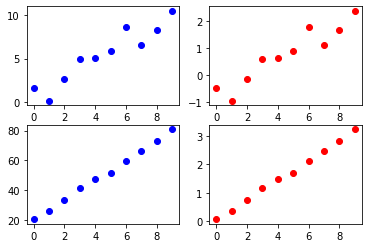

In [7]:
x: np.array = np.vstack([
    np.linspace(0, 10, 10) + np.random.normal(0, 1, 10),
    20 + np.linspace(0, 60, 10) + np.random.normal(0, 1, 10),
])
mean, deviation, y = get_normalized_matrix(x)
assert x.shape == y.shape
print('ORIGINAL', x)
print('NORMALIZED', y)
grid = np.arange(x.shape[1])
figure: Figure = plt.figure()
axes: Axes = figure.add_subplot(2, 2, 1)
axes.plot(grid, x[0].flat, 'o', color='blue')
axes: Axes = figure.add_subplot(2, 2, 2)
axes.plot(grid, y[0].flat, 'o', color='red')
axes: Axes = figure.add_subplot(2, 2, 3)
axes.plot(grid, x[1].flat, 'o', color='blue')
axes: Axes = figure.add_subplot(2, 2, 4)
axes.plot(grid, y[1].flat, 'o', color='red')
plt.show()

## Entropy

- https://en.wikipedia.org/wiki/Entropy_(information_theory)

In information theory, the entropy of a random variable is the average level of "information", "surprise", or "uncertainty" inherent in the variable's possible outcomes.

$$ H(x) = - \sum\limits^{^n}_{i=1} P(x_i) \cdot log P(x_i) $$

In [8]:
def get_entropy_array(matrix: np.array) -> np.array:
    """
    Entropy Matrix.
    """
    P: np.matrix = np.count_nonzero(~np.isnan(matrix.T), axis=1) / matrix.shape[0]
    P[P == 0] = 1
    return np.abs(np.log(P))

In [9]:
X: np.array = np.array([
    [1, np.nan, 3, np.nan, np.nan],
    [4, 5, np.nan, np.nan, np.nan],
    [7, 8, 9, 5, np.nan],
    [7, 8, 9, np.nan, np.nan],
    [7, 8, 9, np.nan, np.nan],
    [7, 8, 9, np.nan, np.nan],
    [7, 8, 9, np.nan, np.nan],
    [1, 2, 2, np.nan, np.nan]
])
E: np.array = get_entropy_array(X)
print(X)
print(E)

[[ 1. nan  3. nan nan]
 [ 4.  5. nan nan nan]
 [ 7.  8.  9.  5. nan]
 [ 7.  8.  9. nan nan]
 [ 7.  8.  9. nan nan]
 [ 7.  8.  9. nan nan]
 [ 7.  8.  9. nan nan]
 [ 1.  2.  2. nan nan]]
[0.         0.13353139 0.13353139 2.07944154 0.        ]


## Cosine Similarity

- https://en.wikipedia.org/wiki/Cosine_similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space. It is defined to equal the cosine of the angle between them, which is also the same as the inner product of the same vectors normalized to both have length 1.

$$ cos(X, Y) = \frac{X \cdot Y}{ \left \Vert X \right \| \cdot \left \Vert Y \right \| } = \frac{ \sum\limits^{^n}_{i=1} X_i \cdot Y_i }{ \sqrt{\sum\limits^{^n}_{i=1} X_i^2} \cdot \sqrt{\sum\limits^{^n}_{i=1} Y_i^2} } $$

In [10]:
def get_cosine(X: np.array, Y: np.array, min_shared_ratings: int = 3) -> float:
    """
    Cosine Similarity function.
    """
    union: np.array = ~np.isnan(np.sum([X, Y], axis=0))
    if np.count_nonzero(union) == 0:
        return 0
    discount: float = min(min_shared_ratings, np.count_nonzero(union)) / min_shared_ratings
    return discount * np.sum(X[union] * Y[union]) / \
        (max(0.0000001, np.sqrt(np.sum(np.power(X[union], 2)))) *\
         max(0.0000001, np.sqrt(np.sum(np.power(Y[union], 2)))))

[ 1. nan  2.  3.  4.  5.  6.  7.  8.  9.] [ 1.  3.  2.  2. nan  8.  9. 10. 11. 12.] 0.9929196160911488


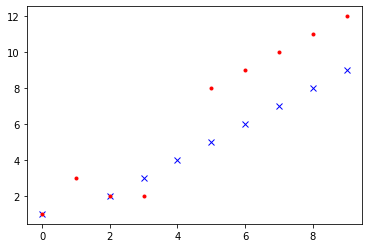

In [11]:
X: np.array = np.array([1, np.nan, 2, 3, 4, 5, 6, 7, 8, 9])
Y: np.array = np.array([1, 3, 2, 2, np.nan, 8, 9, 10, 11, 12])
print(X, Y, get_cosine(X, Y))
figure: Figure = plt.figure()
axes: Axes = figure.add_subplot()
axes.plot(np.arange(X.shape[0]), X, 'x', color='blue')
axes.plot(np.arange(Y.shape[0]), Y, '.', color='red')
plt.show()

[ 1. nan  2.  3.  4.  5.  6.  7.  8.  9.] [ 10.  30.  20.  20.  nan  80.  90. 100. 110. 120.] 0.9929196160911488


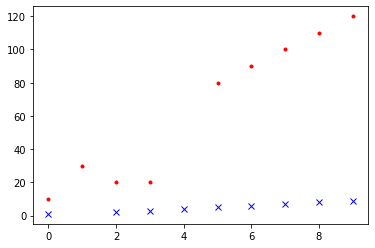

In [12]:
X: np.array = np.array([1, np.nan, 2, 3, 4, 5, 6, 7, 8, 9])
Y: np.array = np.array([10, 30, 20, 20, np.nan, 80, 90, 100, 110, 120])
print(X, Y, get_cosine(X, Y))
figure: Figure = plt.figure()
axes: Axes = figure.add_subplot()
axes.plot(np.arange(X.shape[0]), X, 'x', color='blue')
axes.plot(np.arange(Y.shape[0]), Y, '.', color='red')
plt.show()

[ 1. nan  2.  3.  4.  5.  7.  9. 10.] [100.  65.  32.  24.  nan  10.   7.   4.   2.] 0.21975098781417202


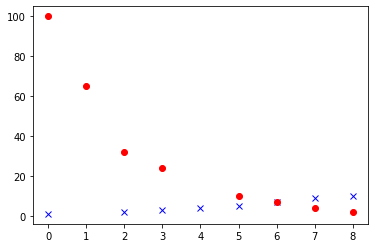

In [13]:
X: np.array = np.array([1, np.nan, 2, 3, 4, 5, 7, 9, 10])
Y: np.array = np.array([100, 65, 32, 24, np.nan, 10, 7, 4, 2])
print(X, Y, get_cosine(X, Y))
figure: Figure = plt.figure()
axes: Axes = figure.add_subplot()
axes.plot(np.arange(X.shape[0]), X, 'x', color='blue')
axes.plot(np.arange(Y.shape[0]), Y, 'o', color='red')
plt.show()

## Similarity Matrix

In [14]:
def get_similarity_matrix(matrix: np.array, min_shared_ratings: int =3) -> np.array:
    """
    Get similarity matrix out of a given matrix.
    """
    correlations: np.array = np.stack([
        [
            0 if i >= j else get_cosine(x, y, min_shared_ratings=min_shared_ratings)
            for j, y in enumerate(matrix)
        ]
        for i, x in enumerate(matrix)
    ])
    return correlations + correlations.T

In [15]:
X: np.array = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
S: np.array = get_similarity_matrix(X)
print(X)
print(S)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[0.         0.97463185 0.95941195]
 [0.97463185 0.         0.99819089]
 [0.95941195 0.99819089 0.        ]]


## Top K-Similar Rows

- https://en.wikipedia.org/wiki/Adjacency_matrix
- https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

In graph theory and computer science, an adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

In [16]:
def get_adjacency_matrix(similar: np.array, k: int = 4) -> np.array:
    """
    Get top k similar rows of a similarity matrix.
    """
    closest: np.array = np.argsort(similar)
    return closest[:, closest.shape[1] - k:]

In [17]:
X: np.array = np.array([
    [0, 2, 3, 1],
    [8, 0, 6, 1],
    [7, 6, 0, 2],
    [2, 3, 1, 0]
])
S: np.array = get_adjacency_matrix(X, 2)
print(X)
print(S)

[[0 2 3 1]
 [8 0 6 1]
 [7 6 0 2]
 [2 3 1 0]]
[[1 2]
 [2 0]
 [1 0]
 [0 1]]


## Collaborative Filtering

Filling the collaborative filtering matrix with ratings from similar rows. The predicted value is the weighted sum of the adjacent rows. Values are denormalized so that the approximate user scores. Entropy is applied to promote novelty across recommendations.

$$ \hat{R_{i,j}} = \mu + σ \cdot \frac{ \sum\limits^{^n}_{u=1} w_u \cdot R_{u,j} }{ \sum\limits^{^n}_{u=1} w_u } $$

In [18]:
def get_collaborative_filtering(ratings: np.array, normalized: np.array, mean: np.array, deviation: np.array, entropy: np.array, adjacent: np.array, similarity: np.array) -> np.matrix:
    """
    Collaborative Filtering function.
    """
    recommendations: np.array = np.empty(ratings.shape)
    for i in range(normalized.shape[0]):
        for j in range(normalized.shape[1]):
            recommendations[i, j] = np.nan
            if np.isnan(normalized[i][j]):
                total: float = 0
                weights: float = 0
                y_hat: float = np.nan
                for k in adjacent[i]:
                    if np.isnan(normalized[k][j]):
                        continue
                    weight: float = similarity[i][k] * entropy[k]
                    weights += weight
                    total += normalized[k][j] * weight
                if weights > 0:
                    y_hat: float = mean[i].flat[0] + deviation[i].flat[0] * total / weights
                recommendations[i, j] = y_hat
    return recommendations

## Novelty

- http://ir.ii.uam.es/saul/pubs/fdia11-vargas.pdf

In case we consider an item in a recommendation list, the probability of been discovered, i.e. p(seen|i, R), can be simplified by a decreasing discount function disc. Novelty of an item as the probability of not having been seen. In case we were interested in emphasize highly novel items, a discount rate `d` is applied on `t` times seen.

$$ \hat{R_{u,i}} = R_{u,i} \cdot P(seen/u,i) $$

$$ P(seen/u,i) = \frac{1}{(1 + d)^t} $$

[1.         0.99009901 0.98029605 0.97059015 0.96098034 0.95146569
 0.94204524 0.93271805 0.92348322 0.91433982 0.90528695 0.89632372
 0.88744923 0.8786626  0.86996297]


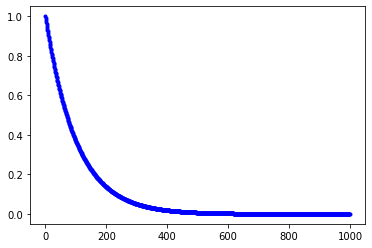

In [19]:
dicount: float = 0.01
X: np.array = 1 / (1 + dicount) ** np.arange(1000)
print(X[:15])
figure: Figure = plt.figure()
axes: Axes = figure.add_subplot()
axes.plot(np.arange(X.shape[0]), X, '.', color='blue')
plt.show()

In [20]:
def get_novelty_matrix(recommendations: np.array, views: np.array, discount_rate: float = 0.01) -> np.array:
    """
    Apply novelty to recommendations.
    """
    return recommendations / (1 + discount_rate) ** views

In [21]:
X: np.array = np.array([
    [3, 5, 8],
    [2, 2, 2],
    [1, 0, 5],
])
V: np.array = np.array([
    [5, 0, 100],
    [0, 10, 20],
    [1, 0, 100],
])
Y:np.array = get_novelty_matrix(X, V)
print(Y)

[[2.85439706 5.         2.9576897 ]
 [2.         1.81057391 1.63908894]
 [0.99009901 0.         1.84855606]]


## Top K Recommendations Getter

In [22]:
def get_top_recommendations(recommendations: np.array, top: int = 3) -> np.array:
    """
    Top K recommendations getter.
    """
    X: np.array = np.copy(recommendations)
    X[np.isnan(X)] = 0
    return np.argsort(X)[:,::-1][:,:top]

In [23]:
X: np.array = np.array([
    [1, 2, 3, 4],
    [4, 3, 2, 1],
])
Y: np.array = get_top_recommendations(X, 2)
print(Y)

[[3 2]
 [0 1]]


## Recommendations Explanation

In [30]:
def explain(top: np.array, adjacent: np.array, ratings: np.matrix, min_rating: float) -> np.array:
    """
    Explain Recommendations.
    """
    Z: np.array = np.empty(top.shape)
    for user in range(top.shape[0]):
        for j in range(top.shape[1]):
            item = top[user][j]
            print(adjacent)
            print(user, item, adjacent[item], top, ratings)
            X: np.array = ratings[user][adjacent[item]]
            Y: np.array = np.greater(X, min_rating)
            if np.count_nonzero(~Y) == adjacent.shape[1]:
                Z[user][j] = -1
                continue
            Z[user][j] = adjacent[item][Y][np.nanargmax(X[Y])]
    return Z.astype(int)

top: np.array = np.array([
    [7, 6, 8],
    [5, 4, 3]
])
adjacent: np.array = np.array([
    [1, 2],
    [0, 2],
    [0, 1],
])
user_user: np.array = ([
    [np.nan, np.nan, 1],
    [1, 1, np.nan],
])
explained: np.array = explain(top, adjacent, user_user, 4)
for user in range(explained.shape[0]):
    for item in range(explained.shape[1]):
        if explained[user][item] == -1:
            continue
        print(f'Item #{top[user][item]} recommended to User #{user} because they liked Item #{explained[user][item]}.')

[[1 2]
 [0 2]
 [0 1]]
0 1 [0 2] [[1 2 3]
 [2 3 4]] [[nan, nan, 1], [1, 1, nan]]


TypeError: only integer scalar arrays can be converted to a scalar index

## User-Based Collaborative Filtering

#### User-User Matrix

In [ ]:
user_user: np.matrix = np.copy(ratings)
print(user_user.shape)
print(user_user)

#### User-User Normalized Matrix

In [ ]:
mean, deviation, normalized = get_normalized_matrix(user_user)
print(normalized.shape)
print(normalized)

#### User-User Similarity Matrix

In [ ]:
similarity: np.array = get_similarity_matrix(normalized)
print(similarity.shape)
print(similarity)

#### User-User Adjacency Matrix

In [ ]:
adjacent: np.array = get_adjacency_matrix(similarity)
print(adjacent.shape)
print(adjacent)

#### Users Entropy Matrix

In [ ]:
entropy: np.array = get_entropy_array(user_user.T)
print(entropy.shape)
print(entropy)

#### User-User Collaborative Filtering

In [ ]:
recommendations: np.matrix = get_collaborative_filtering(ratings=user_user,
                                                         normalized=normalized,
                                                         mean=mean,
                                                         deviation=deviation,
                                                         similarity=similarity,
                                                         entropy=entropy,
                                                         adjacent=adjacent)
print(recommendations)

#### User-User Novelty Recommendations

In [ ]:
recommendations: np.matrix = get_novelty_matrix(recommendations, views)
print(recommendations)

## Item-Based Collaborative Filtering

#### Item-Item Matrix

In [ ]:
item_item: np.array = np.copy(ratings.T)
print(item_item.shape)
print(item_item)

#### Item-Item Normalized Matrix

In [ ]:
mean, deviation, normalized = get_normalized_matrix(item_item)
print(normalized.shape)
print(normalized)

#### Item-Item Similarity Matrix

In [ ]:
similarity: np.array = get_similarity_matrix(normalized)
print(similarity.shape)
print(similarity)

#### Item-Item Adjacency Matrix

In [ ]:
adjacent: np.array = get_adjacency_matrix(similarity)
print(adjacent.shape)
print(adjacent)

#### Items Entropy Matrix

In [ ]:
entropy: np.array = get_entropy_array(item_item.T)
print(entropy.shape)
print(entropy)

#### Item-Item Collaborative Filtering

In [ ]:
recommendations: np.matrix = get_collaborative_filtering(ratings=item_item,
                                                         normalized=normalized,
                                                         mean=mean,
                                                         deviation=deviation,
                                                         similarity=similarity,
                                                         entropy=entropy,
                                                         adjacent=adjacent)
print(recommendations)

#### Item-Item Novelty Recommendations

In [ ]:
recommendations: np.matrix = get_novelty_matrix(recommendations, views.T)
print(recommendations)

#### Item-Item Top K Recommendations

In [ ]:
top: np.array = get_top_recommendations(recommendations.T)
print(top)

#### Trending Items

In [ ]:
trending: np.array = np.nansum(recommendations, axis=1) / np.count_nonzero(~np.isnan(0.0001 + recommendations), axis=1)
print(trending)

#### Item-Item Recommendation Explanation

In [ ]:
def explain(top: np.array, adjacent: np.array, ratings: np.matrix, min_rating: float) -> np.array:
    """
    Explain Recommendations.
    """
    Z: np.array = np.empty(top.shape)
    for user in range(top.shape[0]):
        for j in range(top.shape[1]):
            item = top[user][j]
            X: np.array = ratings[user][adjacent[item]]
            Y: np.array = np.greater(X, min_rating)
            if np.count_nonzero(~Y) == adjacent.shape[1]:
                Z[user][j] = -1
                continue
            Z[user][j] = adjacent[item][Y][np.nanargmax(X[Y])]
    return Z.astype(int)
    
explained: np.array = explain(top, adjacent, user_user, 4)
print(explained)
for user in range(explained.shape[0]):
    for item in range(explained.shape[1]):
        if explained[user][item] == -1:
            continue
        print(f'Item #{top[user][item]} recommended to User #{user} because they liked Item #{explained[user][item]}.')

## Dimensionality Reduction

In [ ]:
USERS = 1000
ITEMS = 1000
MIN_SHARED_RATINGS = 10
ADJACENT_RATINGS = 10